**Types of Edges:** \\

*   Step Edges
*   Roof Edges
*   Line Edges


**Edge Operator must produce:** \\

*   Position
*   Magnitude
*   Orientation (Direction)

**Performance Requirements:** \\

*   High Detection Rate
*   Good Localization
*   Low Noise Sensitivity


First Derivative local extrema (abs val for maxima) - indicate where the edges are on x and y is the intensity \\

2D edge detection: \\

gradient = delI = [partial Ix, partial Iy] \\
gradient mag = ||delI|| = sqrt((partial Ix)^2 + (partial Iy)^2) \\
gradient orientation = theta = tan^-1 (partial Iy/ partial Ix)



# Image Load

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

[[160 161 162 ... 177 167 143]
 [160 160 161 ... 179 172 150]
 [159 160 161 ... 155 141 120]
 ...
 [ 46  54  51 ...  79  90  97]
 [ 43  53  52 ...  92  98 101]
 [ 42  53  53 ... 103 106 104]]


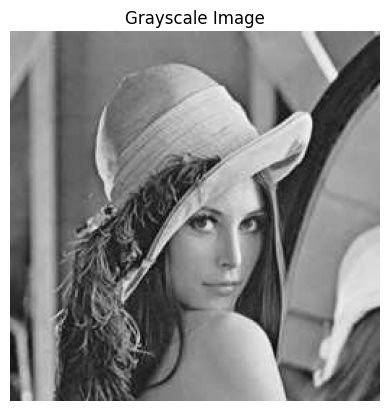

In [3]:
img = Image.open("example.jpg")
gs_matrix = (.299, .587, .114, 0)
gs_img = img.convert("L", matrix = gs_matrix)
gs_arr = np.array(gs_img)

#show img pixel arr
print(gs_arr)

#PIL show method not reliable through colab
plt.imshow(gs_arr, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')  # Hide axis ticks
plt.show()

# Convolution Method

In [4]:
def conv2dim(input_numpy, kernel_numpy):
    b_s, input_channels, input_h, input_w = input_numpy.shape
    output_channels, _, k_h, k_w = kernel_numpy.shape

    output_h = input_h - k_h + 1
    output_w = input_w - k_w + 1

    my_conv_output = np.zeros((b_s, output_channels, output_h, output_w))

    for b in range(b_s):
        for oc in range(output_channels):
            for i in range(output_h):
                for j in range(output_w):
                    conv_sum = 0.0
                    for ic in range(input_channels):
                        region = input_numpy[b, ic, i:i+k_h, j:j+k_w]
                        conv_sum += np.sum(region * kernel_numpy[oc, ic])
                    my_conv_output[b, oc, i, j] = conv_sum

    return my_conv_output

# Gradient Operators

In [5]:
def sobel3(img_arr):
  sobelx = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)
  sobely = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

  # Add batch/channel dimensions to input
  input_tensor = img_arr[np.newaxis, np.newaxis, :, :]

  # Reshape kernels to match conv2dim
  kx = sobelx[np.newaxis, np.newaxis, :, :]
  ky = sobely[np.newaxis, np.newaxis, :, :]

  gradx = conv2dim(input_tensor, kx)[0, 0]  # remove batch/channel
  grady = conv2dim(input_tensor, ky)[0, 0]
  #gradient magnitude
  grad_mag = np.sqrt(gradx**2 + grady**2)
  #gradient orientation
  grad_or = np.arctan2(grady, gradx)
  #normalize the magnitude from 0-255
  grad_mag = (grad_mag / grad_mag.max()) * 255
  grad_mag = grad_mag.astype(np.uint8)
  return grad_mag, grad_or


def sobel5(img_arr):
  sobelx = np.array([[-2, -1, 0, 1, 2],
                     [-2, -1, 0, 1, 2],
                     [-2, -1, 0, 1, 2],
                     [-2, -1, 0, 1, 2],
                     [-2, -1, 0, 1, 2]
                    ], dtype=np.float32)
  sobely = np.array([[2, 2, 2, 2, 2],
                     [1, 1, 1, 1, 1],
                     [0, 0, 0, 0, 0],
                     [-1, -1, -1, -1, -1],
                     [-2, -2, -2, -2, -2]
                    ], dtype=np.float32)
  # Add batch/channel dimensions to input
  input_tensor = img_arr[np.newaxis, np.newaxis, :, :]

  # Reshape kernels to match conv2dim
  kx = sobelx[np.newaxis, np.newaxis, :, :]
  ky = sobely[np.newaxis, np.newaxis, :, :]

  gradx = conv2dim(input_tensor, kx)[0, 0]  # remove batch/channel
  grady = conv2dim(input_tensor, ky)[0, 0]
  #gradient magnitude
  grad_mag = np.sqrt(gradx**2 + grady**2)
  #gradient orientation
  grad_or = np.arctan2(grady, gradx)
  #normalize the magnitude from 0-255
  grad_mag = (grad_mag / grad_mag.max()) * 255
  grad_mag = grad_mag.astype(np.uint8)
  return grad_mag, grad_or

def roberts(img_arr):
  robertx = np.array([[0, 1],
                    [-1, 0]], dtype=np.float32)
  roberty = np.array([[1, 0],
                    [0, -1]], dtype=np.float32)
  # Add batch/channel dimensions to input
  input_tensor = img_arr[np.newaxis, np.newaxis, :, :]

  # Reshape kernels to match conv2dim
  kx = robertx[np.newaxis, np.newaxis, :, :]
  ky = roberty[np.newaxis, np.newaxis, :, :]

  gradx = conv2dim(input_tensor, kx)[0, 0]  # remove batch/channel
  grady = conv2dim(input_tensor, ky)[0, 0]
  #gradient magnitude
  grad_mag = np.sqrt(gradx**2 + grady**2)
  #gradient orientation
  grad_or = np.arctan2(grady, gradx)
  #normalize the magnitude from 0-255
  grad_mag = (grad_mag / grad_mag.max()) * 255
  grad_mag = grad_mag.astype(np.uint8)
  return grad_mag, grad_or

def prewitt(img_arr):
  prewittx = np.array([[-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]], dtype=np.float32)
  prewitty = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [-1, -1, -1]], dtype=np.float32)
  # Add batch/channel dimensions to input
  input_tensor = img_arr[np.newaxis, np.newaxis, :, :]

  # Reshape kernels to match conv2dim
  kx = prewittx[np.newaxis, np.newaxis, :, :]
  ky = prewitty[np.newaxis, np.newaxis, :, :]

  gradx = conv2dim(input_tensor, kx)[0, 0]  # remove batch/channel
  grady = conv2dim(input_tensor, ky)[0, 0]
  #gradient magnitude
  grad_mag = np.sqrt(gradx**2 + grady**2)
  #gradient orientation
  grad_or = np.arctan2(grady, gradx)
  #normalize the magnitude from 0-255
  grad_mag = (grad_mag / grad_mag.max()) * 255
  grad_mag = grad_mag.astype(np.uint8)
  return grad_mag, grad_or


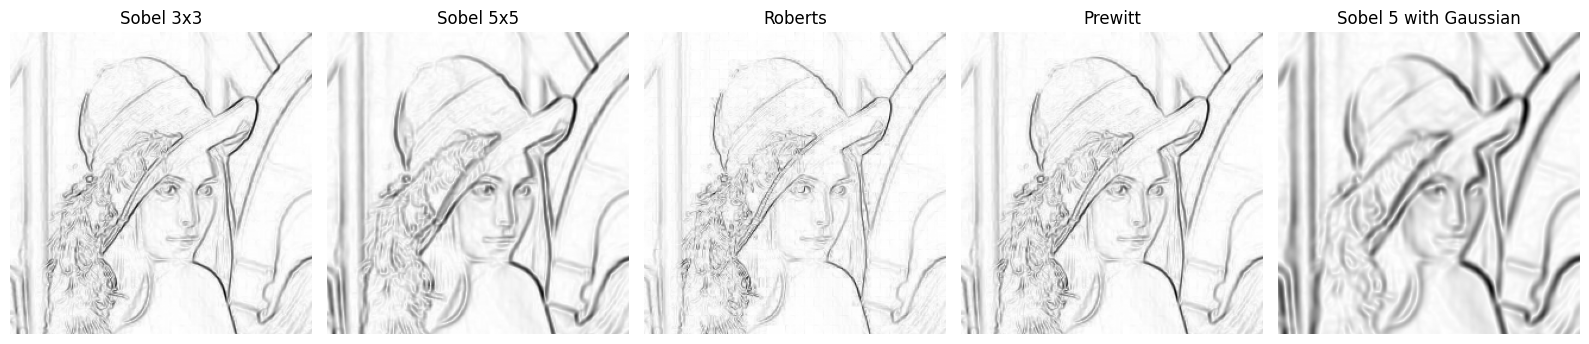

In [38]:
from scipy.ndimage import label
from PIL import ImageFilter
#threshold arr's
def hysteresis_threshold(mag, t0, t1):
    strong = mag >= t1
    weak = (mag >= t0) & (mag < t1)

    # Step 2: label connected components in weak + strong
    all_edges = strong | weak
    labels, num_labels = label(all_edges, structure=np.ones((3, 3)))

    # Step 3: find which labels contain at least one strong pixel
    print(labels)
    strong_labels = np.unique(labels[strong])

    # Step 4: keep only weak pixels connected to strong ones
    output = np.isin(labels, strong_labels) * 255  # multiply by 255 for display

    return output.astype(np.uint8)

mag1, orientation1 = sobel3(gs_arr)
output1 = Image.fromarray(255 - mag1)

mag2, orientation2= sobel5(gs_arr)
output2 = Image.fromarray(255 - mag2)

mag3, orientation3 = roberts(gs_arr)
output3 = Image.fromarray(255 - mag3)

mag4, orientation4 = prewitt(gs_arr)
output4 = Image.fromarray(255 - mag4)

#sobel5 using a gaussian image
blur_gs = gs_img.filter(ImageFilter.GaussianBlur())
blur_gs_arr = np.array(blur_gs)
mag5, orientation5 = sobel5(blur_gs_arr)
output5 = Image.fromarray(255 - mag5)

#PIL show method not reliable through colab
fig = plt.figure(figsize=(16, 6))  # Make figure larger

sub1 = fig.add_subplot(1, 5, 1)
sub1.imshow(output1, cmap='gray')
sub1.set_title("Sobel 3x3")
sub1.axis('off')

sub2 = fig.add_subplot(1, 5, 2)
sub2.imshow(output2, cmap='gray')
sub2.set_title("Sobel 5x5")
sub2.axis('off')

sub3 = fig.add_subplot(1, 5, 3)
sub3.imshow(output3, cmap='gray')
sub3.set_title("Roberts")
sub3.axis('off')

sub4 = fig.add_subplot(1, 5, 4)
sub4.imshow(output4, cmap='gray')
sub4.set_title("Prewitt")
sub4.axis('off')

sub5 = fig.add_subplot(1, 5, 5)
sub5.imshow(output5, cmap='gray')
sub5.set_title("Sobel 5 with Gaussian")
sub5.axis('off')

plt.tight_layout()
plt.show()

# Laplacian Operator

In [7]:
def laplacian(img):
  grad_xx = np.gradient(np.gradient(img, axis = 1), axis = 1)
  grad_yy = np.gradient(np.gradient(img, axis = 0), axis = 0)
  return grad_yy + grad_xx

def laplacianK(img_arr):
  laplacianKernel = np.array([[1, 4, 1],
                                [4, -20, 4],
                                [1, 4, 1]], dtype=np.float32)

  input_tensor = img_arr[np.newaxis, np.newaxis, :, :]
  kernel_tensor = laplacianKernel[np.newaxis, np.newaxis, :, :]

  conv_result = conv2dim(input_tensor, kernel_tensor)

  # Remove batch and channel dimensions
  conv_result = conv_result[0, 0]
  return conv_result

(np.float64(-0.5), np.float64(253.5), np.float64(253.5), np.float64(-0.5))

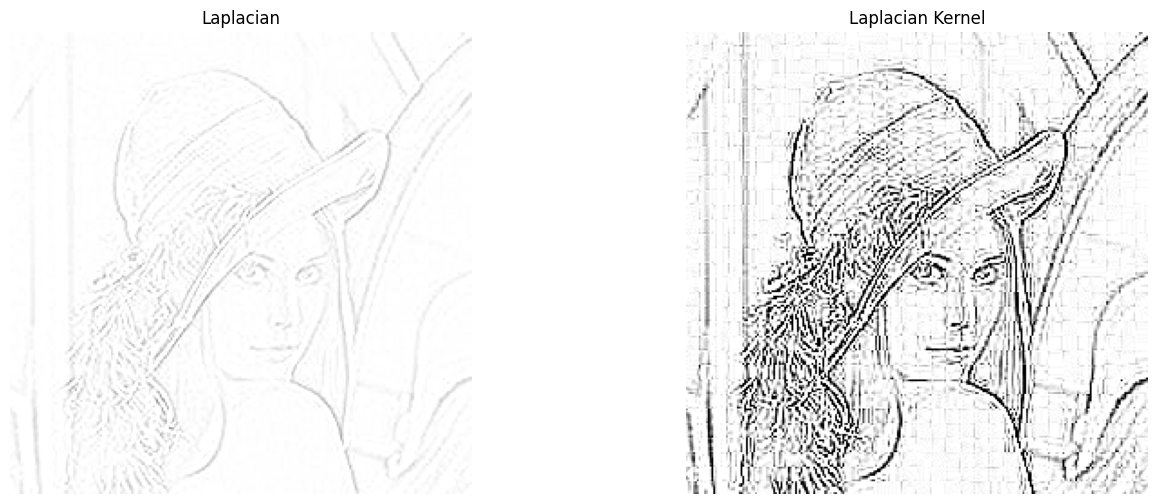

In [8]:
l1 = laplacian(gs_img)
output1 = Image.fromarray(255 - l1)

l2 = laplacianK(gs_arr)
output2 = Image.fromarray(255 - l2)

fig = plt.figure(figsize=(16, 6))  # Make figure larger

sub1 = fig.add_subplot(1, 2, 1)
sub1.imshow(output1, cmap='gray')
sub1.set_title("Laplacian")
sub1.axis('off')

sub2 = fig.add_subplot(1, 2, 2)
sub2.imshow(output2, cmap='gray')
sub2.set_title("Laplacian Kernel")
sub2.axis('off')

# Laplacian Across Orientation

(np.float64(-0.5), np.float64(249.5), np.float64(249.5), np.float64(-0.5))

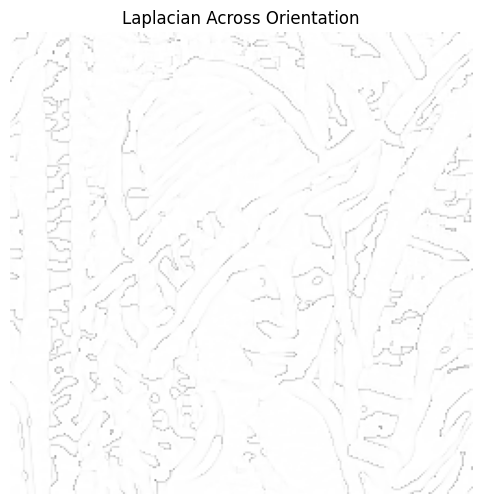

In [50]:
l3 = laplacianK(orientation5)
output1 = Image.fromarray(255 - l3)

fig = plt.figure(figsize=(16, 6))  # Make figure larger

sub1 = fig.add_subplot(1, 1, 1)
sub1.imshow(output1, cmap='gray')
sub1.set_title("Laplacian Across Orientation")
sub1.axis('off')


# Canny Edge Detection

In [39]:
def non_maximum_suppression(mag, orientation):
  H, W = mag.shape
  output = np.zeros((H,W), dtype=np.float32)

  #normalize the angle from 0 to 180
  angle = np.rad2deg(orientation) % 180

  #starting/ending idx ensures 3x3 window
  for i in range(1, H - 1):
    for j in range(1, W - 1):
      q = 255
      r = 255

      #center of the edge angle range
      if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] < 180):
        q = mag[i, j + 1]
        r = mag[i, j - 1]
      elif (22.5 <= angle[i, j] < 67.5): #45
        q = mag[i + 1, j + 1]
        r = mag[i - 1, j - 1]
      elif (67.5 <= angle[i, j] < 112.5): #90
        q = mag[i + 1, j]
        r = mag[i - 1, j]
      elif (112.5 <= angle[i, j] < 157.5): #135
        q = mag[i - 1, j + 1]
        r = mag[i + 1, j - 1]

      if (mag[i, j] >= q) and (mag[i, j] >= r):
        output[i, j] = mag[i, j]
      else:
        output[i, j] = 0

  return output


NMS stats: min=0.0, max=255.0, mean=6.675374984741211
Thresholds: t1=14.0, t0=5.599999904632568
[[   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ... 1161 1161    0]
 [   0    0    0 ...    0    0    0]]


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

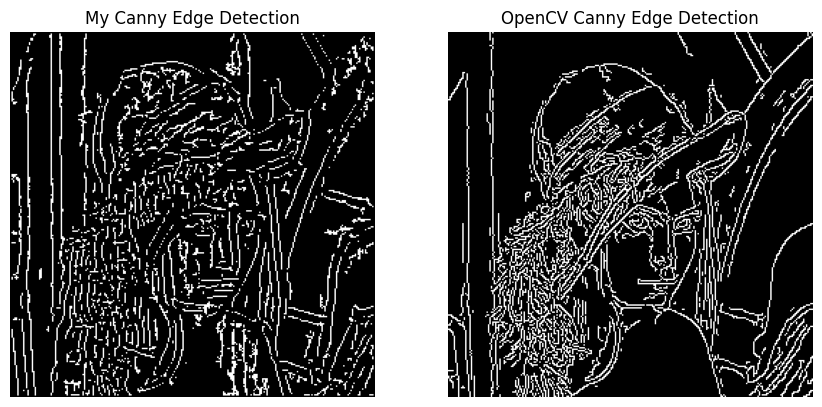

In [46]:
import cv2

def myCanny(gs_img):
  blur_gs = gs_img.filter(ImageFilter.GaussianBlur(radius=1.4))
  blur_gs_arr = np.array(blur_gs)

  mag, orientation = sobel5(blur_gs_arr)
  mag = mag / mag.max() * 255

  nms = non_maximum_suppression(mag, orientation)
  print(f"NMS stats: min={nms.min()}, max={nms.max()}, mean={nms.mean()}")

  t1 = np.percentile(nms, 90)  # strong edges
  t0 = t1 * 0.4

  print(f"Thresholds: t1={t1}, t0={t0}")
  output = hysteresis_threshold(nms, t0, t1)
  return output



output1 = myCanny(gs_img)
output2 = cv2.Canny(gs_arr, 50, 100)


fig = plt.figure(figsize=(16, 6))  # Make figure larger
sub1 = fig.add_subplot(1, 3, 2)
sub1.imshow(output1, cmap='gray')
sub1.set_title("My Canny Edge Detection")
sub1.axis('off')

sub2 = fig.add_subplot(1, 3, 3)
sub2.imshow(output2, cmap='gray')
sub2.set_title("OpenCV Canny Edge Detection")
sub2.axis('off')